We have retraced the steps that Galton and Pearson took to develop the equation of the
regression line that runs through a football shaped scatter plot. But not all scatter plots are
football shaped, not even linear ones. Does every scatter plot have a "best" line that goes
through it? If so, can we still use the formulas for the slope and intercept developed in the
previous section, or do we need new ones?
To address these questions, we need a reasonable definition of "best". Recall that the
purpose of the line is to predict or estimate values of , given values of . Estimates
typically aren't perfect. Each one is off the true value by an error. A reasonable criterion for a
line to be the "best" is for it to have the smallest possible overall error among all straight
lines.
In this section we will make this criterion precise and see if we can identify the best straight
line under the criterion.
Our first example is a dataset that has one row for every chapter of the novel "Little
Women." The goal is to estimate the number of characters (that is, letters, spaces
punctuation marks, and so on) based on the number of periods. Recall that we attempted to
do this in the very first lecture of this course

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
import pylab as pl
plt.style.use('fivethirtyeight')
import matplotlib.patches as mpatches
import functools
from scipy import optimize

In [2]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  
def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table[x] + b


In [3]:
def correlation(t, label_x, label_y):
    
    return np.mean(standard_units(t[label_x])*standard_units(t[label_y]))
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t[label_y])/np.std(t[label_x])

def intercept(t, label_x, label_y):
    return np.mean(t[label_y]) - slope(t, label_x, label_y)*np.mean(t[label_x])
def minimize(f, start=None, smooth=False, log=None, array=False, **vargs):
    """Minimize a function f of one or more arguments.

    Args:
        f: A function that takes numbers and returns a number

        start: A starting value or list of starting values

        smooth: Whether to assume that f is smooth and use first-order info

        log: Logging function called on the result of optimization (e.g. print)

        vargs: Other named arguments passed to scipy.optimize.minimize

    Returns either:
        (a) the minimizing argument of a one-argument function
        (b) an array of minimizing arguments of a multi-argument function
    """
    if start is None:
        assert not array, "Please pass starting values explicitly when array=True"
        arg_count = f.__code__.co_argcount
        assert arg_count > 0, "Please pass starting values explicitly for variadic functions"
        start = [0] * arg_count
    if not hasattr(start, '__len__'):
        start = [start]

    if array:
        objective = f
    else:
        @functools.wraps(f)
        def objective(args):
            return f(*args)

    if not smooth and 'method' not in vargs:
        vargs['method'] = 'Powell'
    result = optimize.minimize(objective, start, **vargs)
    if log is not None:
        log(result)
    if len(start) == 1:
        return result.x.item(0)
    else:
        return result.x

In [4]:
little_women=pd.read_csv('little_women.csv')
little_women

,Characters,Periods
0,21759,189
1,22148,188
2,20558,231
3,25526,195
4,23395,255
5,14622,140
6,14431,131
7,22476,214
8,33767,337
9,18508,185


In [5]:
little_womens = little_women.set_index('Periods')
little_womens

,Characters
Periods,
189,21759
188,22148
231,20558
195,25526
255,23395
140,14622
131,14431
214,22476
337,33767


In [6]:

little_women.head(3)

,Characters,Periods
0,21759,189
1,22148,188
2,20558,231


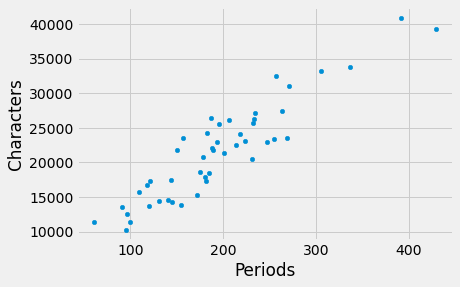

In [7]:
little_women.plot.scatter('Periods', 'Characters')


To explore the data, we will need to use the functions correlation , slope , intercept ,
and fit defined in the previous section.

In [8]:
correlation(little_women, 'Periods', 'Characters')

0.9229576895854817

The scatter plot is remarkably close to linear, and the correlation is more than 0.92.


## Error in Estimation¶
The graph below shows the scatter plot and line that we developed in the previous section.
We don't yet know if that's the best among all lines. We first have to say precisely what
"best" means.

In [9]:
def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table[x] + b


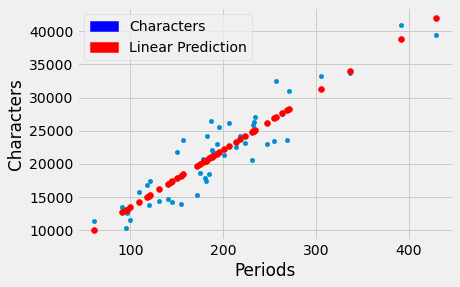

In [10]:
lw_with_predictions=little_women.copy()
lw_with_predictions['Linear Prediction']=fit(little_women, 'Periods', 'Characters')
lw_with_predictions.plot.scatter('Periods', 'Characters')
plt.scatter(lw_with_predictions['Periods'],lw_with_predictions['Linear Prediction'],color='red')
red_patch = mpatches.Patch(color='red', label='Linear Prediction')
blue_patch = mpatches.Patch(color='blue', label='Characters')
plt.legend(handles=[blue_patch,red_patch ])

Corresponding to each point on the scatter plot, there is an error of prediction calculated as
the actual value minus the predicted value. It is the vertical distance between the point and
the line, with a negative sign if the point is below the line.

In [11]:
actual = lw_with_predictions['Characters']
predicted = lw_with_predictions['Linear Prediction']
errors = actual - predicted

In [12]:
lw_with_predictions['Error']= errors
lw_with_predictions

,Characters,Periods,Linear Prediction,Error
0,21759,189,21183.596794,575.403206
1,22148,188,21096.618953,1051.381047
2,20558,231,24836.666127,-4278.666127
3,25526,195,21705.463842,3820.536158
4,23395,255,26924.134317,-3529.134317
5,14622,140,16921.682573,-2299.682573
6,14431,131,16138.882001,-1707.882001
7,22476,214,23358.042826,-882.042826
8,33767,337,34056.317301,-289.317301
9,18508,185,20835.685429,-2327.685429


We can use slope and intercept to calculate the slope and intercept of the fitted line. The
graph below shows the line (in light blue). The errors corresponding to four of the points are
shown in red. There is nothing special about those four points. They were just chosen for
clarity of the display. The function lw_errors takes a slope and an intercept (in that order)
as its arguments and draws the figure

In [13]:
lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods',
'Characters')


In [14]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    plt.scatter(little_women['Periods'], little_women['Characters'])
    xlims = np.array([50, 450])
    plt.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plt.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope of Regression Line:  87.0 characters per period
Intercept of Regression Line: 4745.0 characters


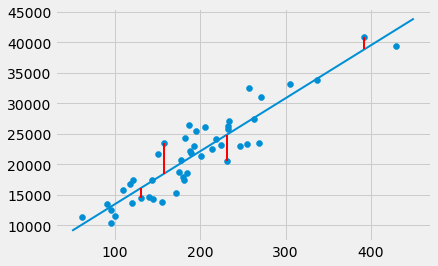

In [15]:
print('Slope of Regression Line: ', np.round(lw_reg_slope),'characters per period')
print('Intercept of Regression Line:',np.round(lw_reg_intercept), 'characters')
lw_errors(lw_reg_slope, lw_reg_intercept)

Had we used a different line to create our estimates, the errors would have been different.
The graph below shows how big the errors would be if we were to use another line for
estimation. The second graph shows large errors obtained by using a line that is downright

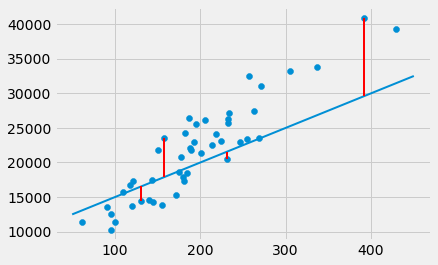

In [16]:
 lw_errors(50, 10000)

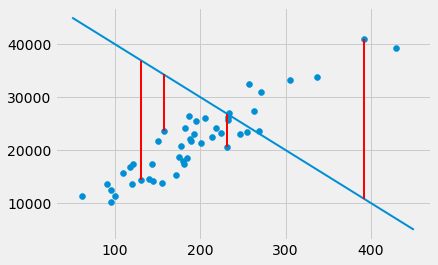

In [17]:
lw_errors(-100, 50000)

What we need now is one overall measure of the rough size of the errors. You will recognize
the approach to creating this – it's exactly the way we developed the SD.
If you use any arbitrary line to calculate your estimates, then some of your errors are likely to
be positive and others negative. To avoid cancellation when measuring the rough size of the
errors, we will take the mean of the sqaured errors rather than the mean of the errors
themselves.
The mean squared error of estimation is a measure of roughly how big the squared errors
are, but as we have noted earlier, its units are hard to interpret. Taking the square root yields
the root mean square error (rmse), which is in the same units as the variable being predicted
and therefore much easier to understand

Minimizing the Root Mean Squared Error¶
Our observations so far can be summarized as follows.
To get estimates of based on , you can use any line you want.
Every line has a root mean squared error of estimation.
"Better" lines have smaller errors.
Is there a "best" line? That is, is there a line that minimizes the root mean squared error
among all lines?
To answer this question, we will start by defining a function lw_rmse to compute the root
mean squared error of any line through the Little Women scatter diagram. The function takes
the slope and the intercept (in that order) as its arguments.

In [18]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women['Periods']
    y = little_women['Characters']
    fitted = slope * x + intercept
    mse = np.mean((y - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Root mean squared error: 4322.167831766537


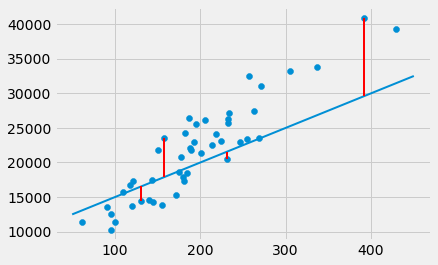

In [19]:
 lw_rmse(50, 10000)

Root mean squared error: 16710.11983735375


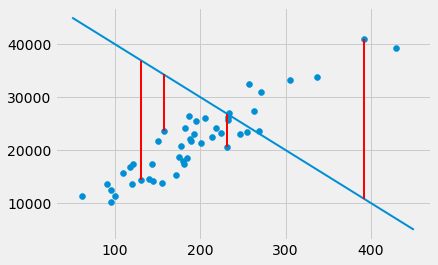

In [20]:
lw_rmse(-100, 50000)

Bad lines have big values of rmse, as expected. But the rmse is much smaller if we choose a slope and intercept close to those of the regression line.

Root mean squared error: 2715.5391063834586


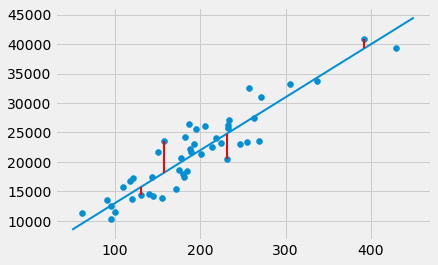

In [21]:
lw_rmse(90, 4000)

Here is the root mean squared error corresponding to the regression line. By a remarkable fact of mathematics, no other line can beat this one.

## The regression line is the unique straight line that minimizes the mean squared error of estimation among all straight lines.

Root mean squared error: 2701.6907853118555


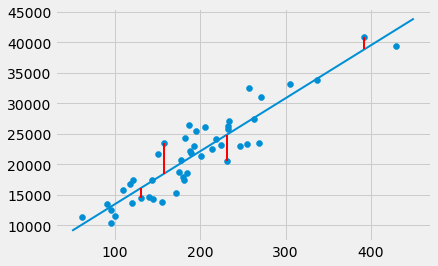

In [22]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

The proof of this statement requires abstract mathematics that is beyond the scope of this course. On the other hand, we do have a powerful tool – Python – that performs large numerical computations with ease. So we can use Python to confirm that the regression line minimizes the mean squared error.



## Numerical Optimization 
First note that a line that minimizes the root mean squared error is also a line that minimizes the squared error. The square root makes no difference to the minimization. So we will save ourselves a step of computation and just minimize the mean squared error (mse).

We are trying to predict the number of characters ( y ) based on the number of periods ( x ) in chapters of Little Women. If we use the line
prediction = ax+b
 
it will have an mse that depends on the slope  a  and the intercept  b . The function lw_mse takes the slope and intercept as its arguments and returns the corresponding mse.

In [23]:
def lw_mse(any_slope, any_intercept):
    x = little_women['Periods']
    y = little_women['Characters']
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

Let's check that lw_mse gets the right answer for the root mean squared error of the regression line. Remember that lw_mse returns the mean squared error, so we have to take the square root to get the rmse.

In [24]:
lw_mse(lw_reg_slope, lw_reg_intercept)**0.5

2701.6907853118555

That's the same as the value we got by using lw_rmse earlier:

Root mean squared error: 2701.6907853118555


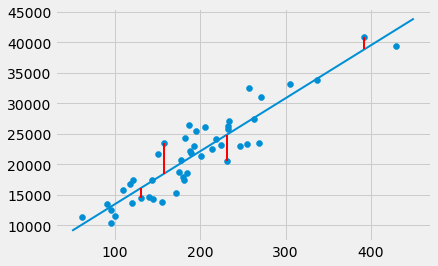

In [25]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

You can confirm that lw_mse returns the correct value for other slopes and intercepts too. For example, here is the rmse of the extremely bad line that we tried earlier.

In [26]:
lw_mse(-100, 50000)**0.5

16710.11983735375

And here is the rmse for a line that is close to the regression line.

In [27]:
lw_mse(90, 4000)**0.5

2715.5391063834586

If we experiment with different values, we can find a low-error slope and intercept through trial and error, but that would take a while. Fortunately, there is a Python function that does all the trial and error for us.

The minimize function can be used to find the arguments of a function for which the function returns its minimum value. Python uses a similar trial-and-error approach, following the changes that lead to incrementally lower output values.

The argument of minimize is a function that itself takes numerical arguments and returns a numerical value. For example, the function lw_mse takes a numerical slope and intercept as its arguments and returns the corresponding mse.

The call minimize(lw_mse) returns an array consisting of the slope and the intercept that minimize the mse. These minimizing values are excellent approximations arrived at by intelligent trial-and-error, not exact values based on formulas.

In [28]:
best = minimize(lw_mse)
best


array([  86.97784101, 4744.78484127])

These values are the same as the values we calculated earlier by using the slope and intercept functions. We see small deviations due to the inexact nature of minimize, but the values are essentially the same.



In [29]:
print("slope from formula:        ", lw_reg_slope)
print("slope from minimize:       ", best.item(0))
print("intercept from formula:    ", lw_reg_intercept)
print("intercept from minimize:   ", best.item(1))

slope from formula:         86.97784125829823
slope from minimize:        86.97784101391096
intercept from formula:     4744.784796574924
intercept from minimize:    4744.784841267639


The Least Squares Line 
Therefore, we have found not only that the regression line minimizes mean squared error, but also that minimizing mean squared error gives us the regression line. The regression line is the only line that minimizes mean squared error.

That is why the regression line is sometimes called the "least squares line."